In [1]:
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
import pandas as pd
from sklearn import preprocessing

In [2]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
#faces = pd.DataFrame(faces)

print('dimensiones:',faces.shape)

#fig = plt.figure(figsize=(10,10)) 
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# plot 25 random faces
#j = 1
#np.random.seed(0)
#for i in np.random.choice(range(faces.shape[0]), 25): 
    #print(faces[i,:],np.shape(faces[i,:]))
    #ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    #ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
    #j += 1
#plt.show()
# guardo las imagenes como png desde arreglos numpy

dimensiones: (400, 4096)


In [3]:
entrenamiento=np.setdiff1d(np.arange(0,400),(np.arange(9,400,10)))
prueba=np.arange(9,400,10)
Train=faces[entrenamiento]
Test=faces[prueba]
scaler = StandardScaler(with_mean=True,with_std=True)
train_scale = scaler.fit_transform(Train)

#for i in range(Train.shape[0]):
#    plt.imsave('/Users\javie\OneDrive\Documentos\CIMAT\Ciencia de datos\Tarea 2\Ejercicio2/Entrenamiento/img'+str(i+1)+'.png',
#               np.reshape(Train[i,:],(64,64)),cmap='gray')
#for i in range(Test.shape[0]):
#    plt.imsave('/Users\javie\OneDrive\Documentos\CIMAT\Ciencia de datos\Tarea 2\Ejercicio2/Prueba/img'+str(i+1)+'.png',
#               np.reshape(Test[i,:],(64,64)),cmap='gray')

In [4]:
Train

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.3677686 , 0.3677686 , 0.35123968, ..., 0.4876033 , 0.5123967 ,
        0.5495868 ],
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576]], dtype=float32)

(360, 4096)


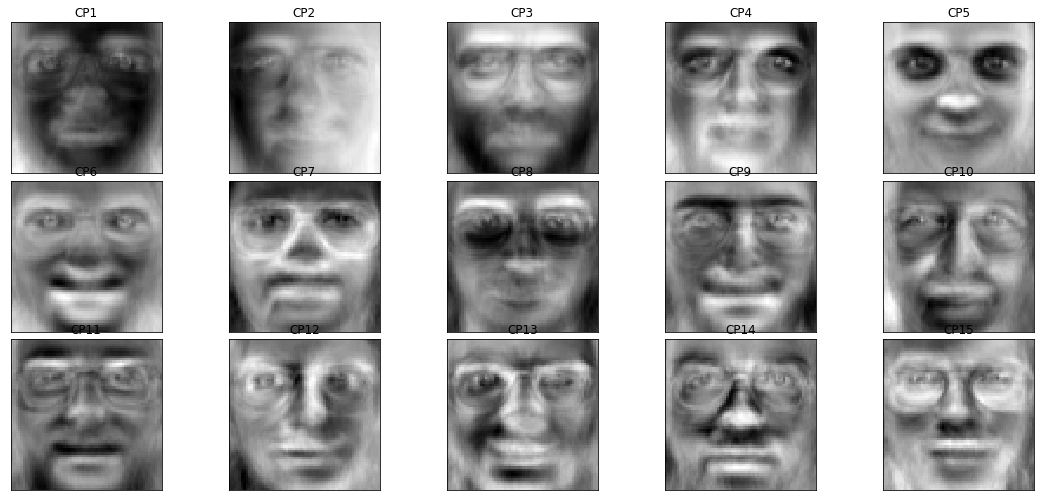

In [5]:
n_comp = 40# numero de componentes
pca = PCA(n_comp)
train_proj = pca.fit_transform(train_scale) 
fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
# Graficamos los primeros 10 componentes
faces_train = pca.inverse_transform(train_proj)
print(np.shape(faces_train))
for i in range(15): 
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[], title = 'CP'+str(i+1))
    ax.imshow(np.reshape(pca.components_[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

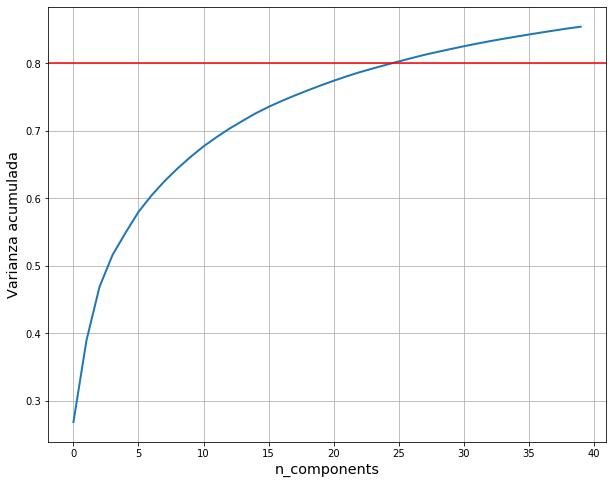

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.grid(), plt.axis('tight'), plt.xlabel('n_components',fontsize="x-large"), plt.ylabel('Varianza acumulada',fontsize="x-large")
plt.show()

In [20]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
#from bokeh.palettes import brewer, Viridis256
import re

# para ordenar los archivos según su numeración...
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

dir_tr = '/Users\javie\OneDrive\Documentos\CIMAT\Ciencia de datos\Tarea 2\Ejercicio2\Entrenamiento'
sorted_files = sorted_alphanumeric(os.listdir(dir_tr))
name_imgs_tr = [os.path.join(dir_tr,f) for f in sorted_files]

import colorcet as cc
import matplotlib.colors as colors
from colorcet.plotting import swatch, swatches, candy_buttons

# cc.glasbey_bw es un mapa de colores para datos categóricos... 
# ver https://colorcet.holoviz.org/user_guide/Categorical.html
lab = np.concatenate([np.repeat(i,9) for i in range(1,41)]) #10 fotos por sujeto
color_map = [colors.rgb2hex(cc.glasbey_bw[i]) for i in lab-1]

# diccionario con los datos para la grafica de Bokeh
pc_source = dict(x=train_proj[:,0], y=train_proj[:,1], 
                 label=lab,
                 color=color_map,
                 desc=['sujeto: '+str(i) for i in range(1,train_proj.shape[0]+1)],
                 imgs=name_imgs_tr)
output_file("eigenfaces.html")

source = ColumnDataSource(data = pc_source)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=1000, plot_height=800, tools=[hover], title="Eigenfaces",
          x_axis_label="PC 1",y_axis_label="PC 2")

p.circle('x', 'y', size=5,  color='color', source=source)

show(p)

In [11]:
Y

array([[-16.555939  , -12.708981  ,  28.378738  , ...,   2.176313  ,
         -1.4529948 ,  -2.1116927 ],
       [  2.673922  , -12.20963   , -18.749819  , ...,  -1.69401   ,
         -3.2769222 ,  -3.0276551 ],
       [-20.511604  , -12.348694  ,  16.622974  , ...,   0.31967992,
          5.3006687 ,   0.34657478],
       ...,
       [  5.1854672 ,  -2.5701118 ,  24.113068  , ...,   4.1261363 ,
          1.8714125 ,  -3.837707  ],
       [ 68.20643   ,  12.849329  ,  -5.2053432 , ...,   5.273209  ,
         -0.9406229 ,   3.2390394 ],
       [ -5.3319817 ,  12.893481  ,   7.9994793 , ...,   0.40356517,
          0.5183332 ,   0.5658639 ]], dtype=float32)

$\textbf{Ejercicio b}$

In [10]:
# Graficamos los primeros 10 componentes
scaler = StandardScaler(with_mean=True,with_std=True)
test_scale = scaler.fit_transform(Test)

Y=np.dot(test_scale,pca.components_.T)
Y=test_scale@pca.components_.T
#faces_test = Y @ pca.components_+ np.mean(Test,axis=0)
faces_test = pca.inverse_transform(Y)

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
#for i in range(40): 
#    ax = fig.add_subplot(5, 8, i+1, xticks=[], yticks=[], title = 'Sujeto '+str(i+1))
#    ax.imshow(np.reshape(faces_test[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

<Figure size 1080x360 with 0 Axes>

In [12]:
pca.components_.T[0]

array([-2.72147916e-03, -2.20578201e-02,  1.08010694e-03,  1.35733036e-03,
        1.54968845e-02, -4.14493773e-03, -4.04248834e-02, -6.92506801e-05,
        8.41477979e-03,  2.71691997e-02,  2.80199088e-02,  1.34524032e-02,
        1.47802513e-02,  8.38790275e-03, -1.65363736e-02,  8.01642518e-03,
        1.17543433e-02,  8.20794608e-03,  2.52823979e-02, -3.77875753e-02,
        5.06919483e-03,  4.77322610e-03,  1.22747407e-03,  1.06088314e-02,
        1.75495818e-02, -7.14915525e-03,  1.27756596e-02, -6.07460877e-03,
        2.13580467e-02, -4.56331857e-02,  1.69797742e-04, -2.67475992e-02,
        1.23255951e-02, -2.84768268e-03,  2.09171344e-02, -4.02690377e-03,
       -1.84461586e-02, -1.64222196e-02, -3.39097753e-02, -6.98066689e-03],
      dtype=float32)

In [15]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
#from bokeh.palettes import brewer, Viridis256
import re

# para ordenar los archivos según su numeración...
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

dir_test = '/Users\javie\OneDrive\Documentos\CIMAT\Ciencia de datos\Tarea 2\Ejercicio2/Prueba/'
sorted_files = sorted_alphanumeric(os.listdir(dir_test))
name_imgs_tr = [os.path.join(dir_test,f) for f in sorted_files]

import colorcet as cc
import matplotlib.colors as colors
from colorcet.plotting import swatch, swatches, candy_buttons

lab = np.concatenate([np.repeat(i,1) for i in range(1,41)]) #10 fotos por sujeto
color_map = [colors.rgb2hex(cc.glasbey_bw[i]) for i in lab-1]

# diccionario con los datos para la grafica de Bokeh
pc_sourcet = dict(x=faces_test[:,0], y=faces_test[:,1], 
                 label=lab,
                 color=color_map,
                 desc=['sujeto: '+str(i) for i in range(1,faces_test.shape[0]+1)],
                 imgs=name_imgs_tr)
output_file("eigenfaces_test.html")


source = ColumnDataSource(data = pc_source)
source_test = ColumnDataSource(data = pc_sourcet)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=1000, plot_height=800, tools=[hover], title="Eigenfaces",
          x_axis_label="PC 1",y_axis_label="PC 2")

#p.circle('x', 'y', size=5,  color='color', source=source)
p.triangle('x', 'y', size=7,  color='color', source=source_test)

show(p)

# Inciso c)

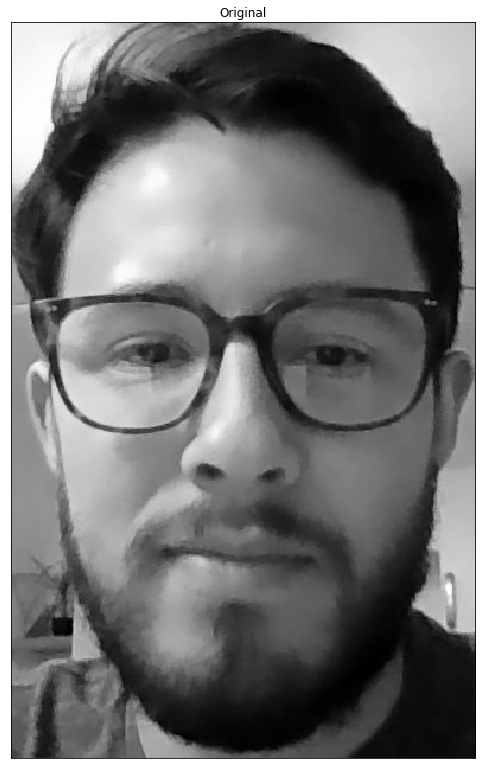

In [23]:
import os
os.chdir('/Users\javie\OneDrive\Documentos\CIMAT\Ciencia de datos\Tarea 2\Ejercicio2')

from PIL import Image

%matplotlib inline
import matplotlib.image as mpimg

#Mi imagen
im = Image.open("foto.jpg")

I1=im.convert('L') # convierte a escala de grises
myface=np.asarray(I1,dtype=np.float64)
#I2=np.reshape(myface,(4096,))
#print(I2)

fig = plt.figure(figsize=(20,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 

ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[], title = 'Original')
ax.imshow(myface, cmap=plt.cm.gray)